# Task definition

Task №2
1. Develop yourself using numpy library: 

a) a function to implement stochastic gradient descent (SGD) algorithm 
b) Adam's optimization algorithm 
for a function of two variables f(x,y).

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.


### Function   -  f(x,y) = x**2 + 4*y**2 - 2*x*y - x

In [64]:
from sympy import *
from sympy.plotting import plot
from sympy.plotting import plot3d
import numpy as np

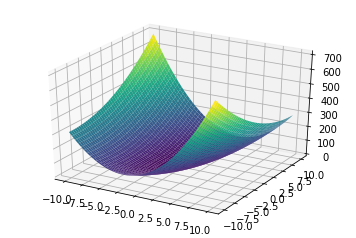

In [65]:
x, y, z = symbols('x y z')
plot3d(x**2 + 4*y**2 - 2*x*y - x);

In [66]:
def f(x,y):
    return x**2 + 4*y**2 - 2*x*y - x

def diff_rand(x,y,i):
    if i == 0: 
        p = -2*x + 8*y
    elif i == 1:
        p = 2*x - 2*y - 1
    return p

def diff(x,y):
    p2 = -2*x + 8*y
    p1 = 2*x - 2*y - 1
    return p1, p2

### SGD implementation

In [88]:
def SGD(x = -9, y = 9, lr = 0.01):
    mem_x = []
    mem_y = []
    for i in range(30500):
        mem_x.append(x)
        mem_y.append(y)
        
        rand_v = np.random.randint(0,2)
       # print(rand_v)
        dev = diff_rand(x, y,rand_v)
       # print(rand_v)
        if rand_v == 1:
            x -= lr*(dev)
        elif rand_v == 0:
            y -= lr*(dev)
        
        
        
    return (x, y, mem_x, mem_y)


#### Optimization results

In [91]:
min_x, min_y, mem_x_sgd, mem_y_sgd = SGD()
print(min_x, min_y)

0.6666666666666627 0.16666666666666552


### Adam implementation

In [50]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [51]:
def check_convergence(w0, w1):
    return (w0 == w1)

In [52]:
w_0 = -9
b_0 = 9
adam = AdamOptim()
t = 1 
converged = False
mem_x = []
mem_y = []
while not converged:
    dw, db = diff(w_0, b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    mem_x.append(w_0)
    mem_y.append(b_0)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=-8.990000000002702
iteration 2: weight=-8.980001522142823
iteration 3: weight=-8.970005584703978
iteration 4: weight=-8.96001320546418
iteration 5: weight=-8.950025399188748
iteration 6: weight=-8.940043175156488
iteration 7: weight=-8.930067534738047
iteration 8: weight=-8.920099469044423
iteration 9: weight=-8.910139956662489
iteration 10: weight=-8.900189961493016
iteration 11: weight=-8.89025043070513
iteration 12: weight=-8.880322292819399
iteration 13: weight=-8.870406455929936
iteration 14: weight=-8.860503806074007
iteration 15: weight=-8.850615205755632
iteration 16: weight=-8.840741492627807
iteration 17: weight=-8.830883478335993
iteration 18: weight=-8.821041947523737
iteration 19: weight=-8.811217656999512
iteration 20: weight=-8.801411335062296
iteration 21: weight=-8.791623680981896
iteration 22: weight=-8.781855364628754
iteration 23: weight=-8.772107026246788
iteration 24: weight=-8.7623792763619
iteration 25: weight=-8.752672695817942
iteration 26:

iteration 1187: weight=-2.1195864063166723
iteration 1188: weight=-2.1154805245734876
iteration 1189: weight=-2.1113781848172937
iteration 1190: weight=-2.1072793879300202
iteration 1191: weight=-2.1031841347871505
iteration 1192: weight=-2.0990924262577293
iteration 1193: weight=-2.095004263204369
iteration 1194: weight=-2.090919646483256
iteration 1195: weight=-2.0868385769441575
iteration 1196: weight=-2.0827610554304283
iteration 1197: weight=-2.0786870827790156
iteration 1198: weight=-2.0746166598204674
iteration 1199: weight=-2.070549787378938
iteration 1200: weight=-2.0664864662721936
iteration 1201: weight=-2.0624266973116203
iteration 1202: weight=-2.058370481302229
iteration 1203: weight=-2.0543178190426628
iteration 1204: weight=-2.0502687113252014
iteration 1205: weight=-2.04622315893577
iteration 1206: weight=-2.0421811626539426
iteration 1207: weight=-2.038142723252951
iteration 1208: weight=-2.034107841499689
iteration 1209: weight=-2.0300765181547193
iteration 1210: wei

iteration 2187: weight=0.2963868324479015
iteration 2188: weight=0.2973732568546669
iteration 2189: weight=0.29835761673010064
iteration 2190: weight=0.299339914851803
iteration 2191: weight=0.30032015399728834
iteration 2192: weight=0.3012983369439765
iteration 2193: weight=0.30227446646918427
iteration 2194: weight=0.30324854535011697
iteration 2195: weight=0.30422057636386
iteration 2196: weight=0.3051905622873704
iteration 2197: weight=0.3061585058974684
iteration 2198: weight=0.30712440997082896
iteration 2199: weight=0.30808827728397337
iteration 2200: weight=0.3090501106132609
iteration 2201: weight=0.31000991273488016
iteration 2202: weight=0.31096768642484096
iteration 2203: weight=0.3119234344589658
iteration 2204: weight=0.3128771596128815
iteration 2205: weight=0.3138288646620107
iteration 2206: weight=0.31477855238156377
iteration 2207: weight=0.3157262255465301
iteration 2208: weight=0.31667188693167003
iteration 2209: weight=0.3176155393115063
iteration 2210: weight=0.31

iteration 3186: weight=0.6562652262177634
iteration 3187: weight=0.6563135224318594
iteration 3188: weight=0.6563616206328905
iteration 3189: weight=0.6564095215103127
iteration 3190: weight=0.6564572257516967
iteration 3191: weight=0.6565047340427312
iteration 3192: weight=0.656552047067226
iteration 3193: weight=0.6565991655071154
iteration 3194: weight=0.6566460900424612
iteration 3195: weight=0.6566928213514563
iteration 3196: weight=0.6567393601104276
iteration 3197: weight=0.656785706993839
iteration 3198: weight=0.6568318626742952
iteration 3199: weight=0.6568778278225446
iteration 3200: weight=0.6569236031074824
iteration 3201: weight=0.6569691891961543
iteration 3202: weight=0.657014586753759
iteration 3203: weight=0.657059796443652
iteration 3204: weight=0.6571048189273486
iteration 3205: weight=0.6571496548645274
iteration 3206: weight=0.6571943049130329
iteration 3207: weight=0.6572387697288794
iteration 3208: weight=0.657283049966254
iteration 3209: weight=0.65732714627751

iteration 4186: weight=0.6666453866714943
iteration 4187: weight=0.6666455572582743
iteration 4188: weight=0.6666457265708838
iteration 4189: weight=0.6666458946180944
iteration 4190: weight=0.6666460614086231
iteration 4191: weight=0.6666462269511325
iteration 4192: weight=0.6666463912542306
iteration 4193: weight=0.666646554326472
iteration 4194: weight=0.6666467161763573
iteration 4195: weight=0.6666468768123339
iteration 4196: weight=0.6666470362427963
iteration 4197: weight=0.6666471944760862
iteration 4198: weight=0.6666473515204929
iteration 4199: weight=0.6666475073842537
iteration 4200: weight=0.6666476620755538
iteration 4201: weight=0.666647815602527
iteration 4202: weight=0.6666479679732558
iteration 4203: weight=0.6666481191957718
iteration 4204: weight=0.666648269278056
iteration 4205: weight=0.6666484182280387
iteration 4206: weight=0.6666485660536003
iteration 4207: weight=0.6666487127625714
iteration 4208: weight=0.6666488583627329
iteration 4209: weight=0.666649002861

iteration 5185: weight=0.6666666662306032
iteration 5186: weight=0.6666666662367635
iteration 5187: weight=0.6666666662428403
iteration 5188: weight=0.6666666662488347
iteration 5189: weight=0.6666666662547479
iteration 5190: weight=0.6666666662605809
iteration 5191: weight=0.6666666662663346
iteration 5192: weight=0.6666666662720102
iteration 5193: weight=0.6666666662776086
iteration 5194: weight=0.6666666662831309
iteration 5195: weight=0.666666666288578
iteration 5196: weight=0.6666666662939509
iteration 5197: weight=0.6666666662992506
iteration 5198: weight=0.6666666663044781
iteration 5199: weight=0.6666666663096342
iteration 5200: weight=0.6666666663147199
iteration 5201: weight=0.6666666663197361
iteration 5202: weight=0.6666666663246839
iteration 5203: weight=0.6666666663295638
iteration 5204: weight=0.6666666663343771
iteration 5205: weight=0.6666666663391244
iteration 5206: weight=0.6666666663438067
iteration 5207: weight=0.6666666663484248
iteration 5208: weight=0.6666666663

#### Optimization results

In [53]:
print(w_0, b_0)


0.6666666666666645 0.1666666666666661


### The process of finding an extremum illustration

In [77]:
X = np.linspace(-10,10,1000)
Y = np.linspace(-10,10,1000)
Z = [[f(x,y) for x in X] for y in Y]

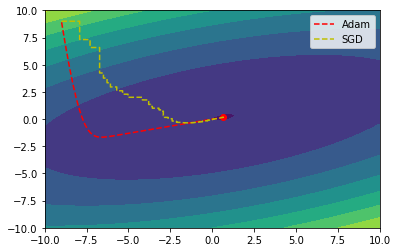

In [92]:
import matplotlib.pyplot as plt

plt.contourf(X, Y, Z)
plt.scatter(0.6666666666648945, 0.1666666666660591, color = 'r')

plt.plot(mem_x, mem_y, color = 'r',linestyle = "--",label = "Adam")
plt.plot(mem_x_sgd, mem_y_sgd, color = 'y',linestyle = "--",label = "SGD")
plt.legend()